# Linear Classification and Gradient Descent

## Step1: Import and divide dataset.
- feature matrix needs to be transformed from sparse matrix to dense matrix using .todense() function.
- targets need to be transformed to n*1 shape. 

In [9]:
from numpy import *
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file

features, targets = load_svmlight_file("australian_scale")

train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size=0.33)

train_targets =  train_targets.reshape(train_targets.shape[0],1)
test_targets =  test_targets.reshape(test_targets.shape[0],1)


## Step2: Initialize linear model parameters

In [10]:
import numpy as np

theta = np.ones((features.shape[1], 1))
maxIteration = 100
c = 0.5
learning_rate = 0.001

train_loss, evaluation_loss, train_accr, evaluation_accr = [],[],[],[]


## Step3: Gradient function, loss funciton and accuracy function

In [11]:
# x_todense_T数组存储了x[i].todense().T的值，减少了重复计算量，提高运算速度
x_todense_T = []
for i in range(train_features.shape[0]):
    x_todense_T.append(train_features[i].todense().T)

def cal_hinge_loss_and_grad(theta,x,y):
    loss,grad = 0,0
    for j in range(x.shape[0]):
        v = y[j]*((theta.T).dot(x_todense_T[j])[0,0])
        loss += max(0,1-v)
        grad += 0 if v > 1 else -y[j]*x[j].todense()
    return (loss/x.shape[0],grad)

def cal_hinge_loss(theta,x,y):
    loss = 0
    for j in range(x.shape[0]):
        v = y[j]*((theta.T).dot(x[j].todense().T)[0,0])
        loss += max(0,1-v)
    return loss/x.shape[0]

def cal_accur(x,y,theta):
    hypothesis = x * theta
    hypothesis[hypothesis > 0] = 1
    hypothesis[hypothesis <= 0] = -1
    return np.count_nonzero(hypothesis == y)/ x.shape[0]

## Step4: Gradient descent

In [12]:
def gradientDescent(w):
    for i in range(maxIteration):
        current_train_loss, gradient = cal_hinge_loss_and_grad(w,train_features,train_targets)
        train_loss.append(current_train_loss)
        evaluation_loss.append( cal_hinge_loss(w,test_features,test_targets))
        w = w-learning_rate*gradient.T
        train_accr.append(cal_accur(train_features,train_targets,w))
        evaluation_accr.append(cal_accur(test_features,test_targets,w))
        
gradientDescent(theta)

## Step5: Draw graph

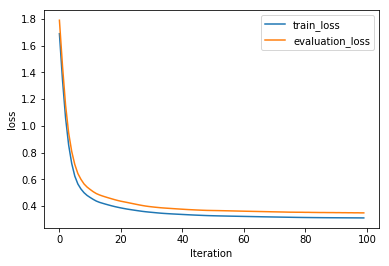

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("Iteration")
plt.ylabel("loss")
plt.plot(train_loss, label="train_loss")
plt.plot(evaluation_loss,label="evaluation_loss" )
plt.legend(loc="upper right")

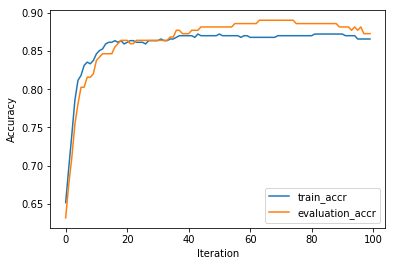

In [14]:
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.plot(train_accr, label="train_accr")
plt.plot(evaluation_accr, label="evaluation_accr")
plt.legend(loc="lower right")